In [1]:
"""This is a Customer Segmentation Market Analysis"""

'This is a Customer Segmentation Market Analysis'

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
#Reading the training data into a dataframe
df_train= pd.read_csv("C:/Users/HP/Downloads/archive (4)/avhacklive/Train.csv")

In [4]:
#Reading the test data into a dataframe
df_test= pd.read_csv("C:/Users/HP/Downloads/archive (4)/avhacklive/Test.csv")

In [5]:
#checking the first five rows of the training set
df_train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [6]:
#checking the first five rows of the test set
df_test.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [7]:
#checking the info of the training set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [8]:
#checking the info of the test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [9]:
"""From the displayed information of the Training and Test set, we can observe that 'term_deposit_subscribed' which is present in the training set is not in the test set. Thus, we drop the column"""

"From the displayed information of the Training and Test set, we can observe that 'term_deposit_subscribed' which is present in the training set is not in the test set. Thus, we drop the column"

In [10]:
#dropping the 'term_deposit_subscribed' column
df_train.drop(columns=["term_deposit_subscribed"], inplace=True)

In [11]:
#checking the training set again
df_train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown


In [12]:
#checking the types of data in the training set
print(df_train.dtypes)

id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
dtype: object


In [13]:
#checking the types of data in the test set
print(df_test.dtypes)

id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
dtype: object


In [14]:
#creating a function to print missing values
def get_MissingValues(df):
    cols = []
    column_with_nan = df.columns[df.isnull().any()]
    for column in column_with_nan:
        percent_missing = round(df[column].isnull().mean()*100,2)        
        cols.append({'colname':column,'percentage':percent_missing,'featureDtype':str(df[column].dtype)})  
    
    if len(cols) > 0:     
        # Creates DataFrame. 
        print(f'{len(cols)} features have missing value')
        missingDF = pd.DataFrame(cols).sort_values(by=['percentage'], ascending=False)
    else:
        missingDF = "No missingValues"
        
    return missingDF

In [15]:
#handling missing values in training dataset
df_train_missing = get_MissingValues(df_train)
df_train_missing.head(df_train_missing.shape[0])

7 features have missing value


,colname,percentage,featureDtype
6,days_since_prev_campaign_contact,81.62,float64
0,customer_age,1.96,float64
2,balance,1.26,float64
4,last_contact_duration,0.98,float64
1,marital,0.47,object
3,personal_loan,0.47,object
5,num_contacts_in_campaign,0.35,float64


In [16]:
#handling missing values in test dataset
df_test_missing = get_MissingValues(df_test)
df_test_missing.head(df_test_missing.shape[0])

7 features have missing value


,colname,percentage,featureDtype
6,days_since_prev_campaign_contact,82.00,float64
0,customer_age,1.99,float64
2,balance,1.33,float64
4,last_contact_duration,0.90,float64
1,marital,0.60,object
3,personal_loan,0.55,object
5,num_contacts_in_campaign,0.33,float64


In [17]:
"""From the analysis above we can see that 'days_since_prev_campaign_contact' has over 80% nan values in both training and test set, Thus, we drop the column"""

"From the analysis above we can see that 'days_since_prev_campaign_contact' has over 80% nan values in both training and test set, Thus, we drop the column"

In [18]:
#dropping the 'days_since_prev_campaign_contact' column in training dataset
df_train.drop(columns=["days_since_prev_campaign_contact"], inplace=True)

In [19]:
#checking the training set 
df_train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown


In [20]:
#dropping the 'days_since_prev_campaign_contact' column in test dataset
df_test.drop(columns=["days_since_prev_campaign_contact"], inplace=True)

In [21]:
#checking the test set 
df_test.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,1,success


In [22]:
"""Exploring the training dataset"""

'Exploring the training dataset'

<Figure size 720x720 with 0 Axes>

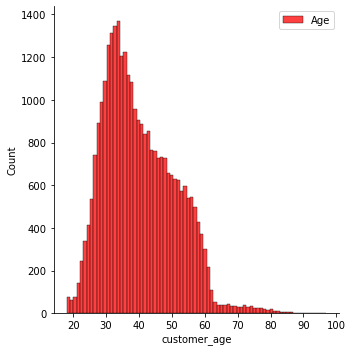

In [23]:
#visualizing Density distribution across age range for training set
plt.figure(figsize=(10,10))
sns.displot(df_train.customer_age, color="red", label="Age")
plt.legend();

<Figure size 720x720 with 0 Axes>

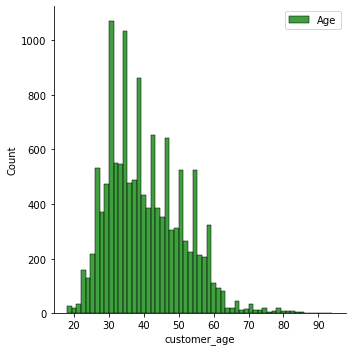

In [24]:
#visualizing Density distribution across age range for test set
plt.figure(figsize=(10,10))
sns.displot(df_test.customer_age, color="green", label="Age")
plt.legend();

<Figure size 720x720 with 0 Axes>

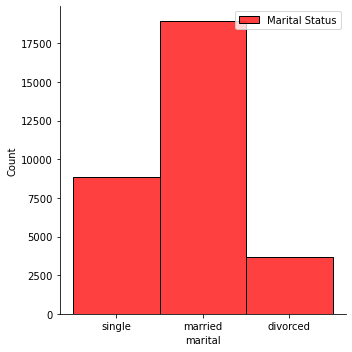

In [25]:
#visualizing Density distribution across marital status for training set
plt.figure(figsize=(10,10))
sns.displot(df_train.marital, color="red", label="Marital Status")
plt.legend();

<Figure size 720x720 with 0 Axes>

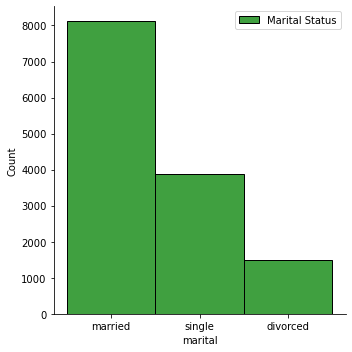

In [26]:
#visualizing Density distribution across marital status for test set
plt.figure(figsize=(10,10))
sns.displot(df_test.marital, color="green", label="Marital Status")
plt.legend();

<Figure size 720x720 with 0 Axes>

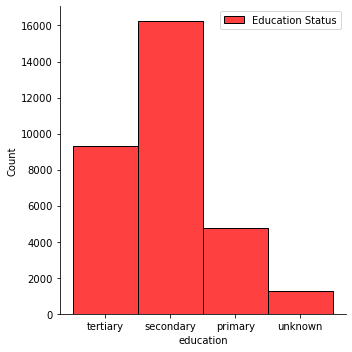

In [27]:
#visualizing density distribution across education for training set
plt.figure(figsize=(10,10))
sns.displot(df_train.education, color="red", label="Education Status")
plt.legend();

<Figure size 720x720 with 0 Axes>

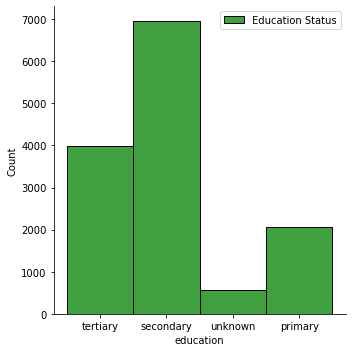

In [28]:
#visualizing density distribution across education for test set
plt.figure(figsize=(10,10))
sns.displot(df_test.education, color="green", label="Education Status")
plt.legend();

<Figure size 720x720 with 0 Axes>

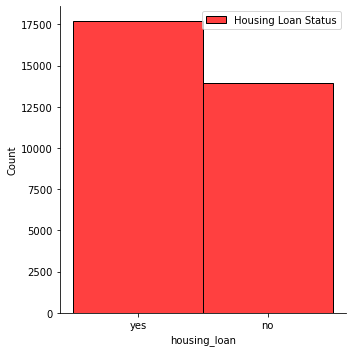

In [29]:
#visualizing density distribution across housing loan for training set
plt.figure(figsize=(10,10))
sns.displot(df_train.housing_loan, color="red", label="Housing Loan Status")
plt.legend();

<Figure size 720x720 with 0 Axes>

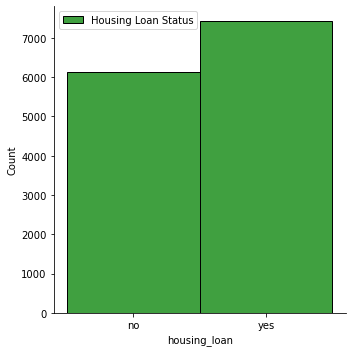

In [30]:
#visualizing density distribution across housing loan for test set
plt.figure(figsize=(10,10))
sns.displot(df_test.housing_loan, color="green", label="Housing Loan Status")
plt.legend();

<Figure size 720x720 with 0 Axes>

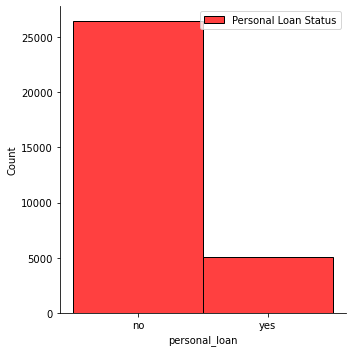

In [31]:
#visualizing density distribution across personal loan for training set
plt.figure(figsize=(10,10))
sns.displot(df_train.personal_loan, color="red", label="Personal Loan Status")
plt.legend();

<Figure size 720x720 with 0 Axes>

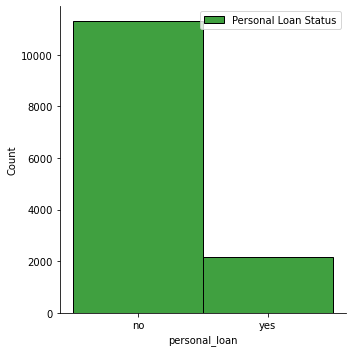

In [32]:
#visualizing density distribution across personal loan for test set
plt.figure(figsize=(10,10))
sns.displot(df_test.personal_loan, color="green", label="Personal Loan Status")
plt.legend();

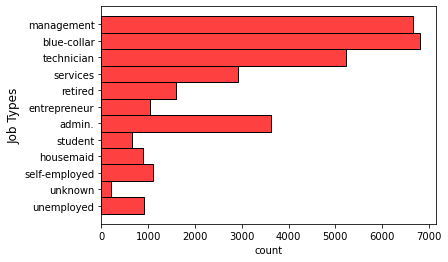

In [33]:
#visualizing density distribution across job type for training set
g = sns.histplot(data=df_train, y="job_type", color="red")
g.set_ylabel("Job Types", fontsize=12)
g.set_xlabel("count")
plt.show()

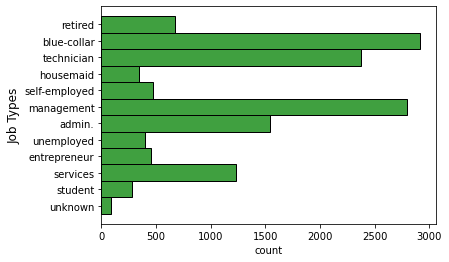

In [34]:
#visualizing density distribution across job type for test set
g = sns.histplot(data=df_test, y="job_type", color="green")
g.set_ylabel("Job Types", fontsize=12)
g.set_xlabel("count")
plt.show()

In [35]:
#descriptive analysis
df_train.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,0.591620
std,10.751392,3085.342417,8.322970,256.181479,3.153293,2.499675
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,275.000000


In [36]:
df_test.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
count,13294.000000,13383.000000,13564.000000,13442.000000,13519.000000,13564.000000
mean,40.450429,1341.405514,15.778089,261.171031,2.730971,0.553966
std,10.747881,2839.670990,8.321562,261.195560,2.941338,1.762402
min,18.000000,-6849.000000,1.000000,0.000000,1.000000,0.000000
25%,32.000000,70.500000,8.000000,102.000000,1.000000,0.000000
50%,39.000000,447.000000,16.000000,182.000000,2.000000,0.000000
75%,48.000000,1466.000000,21.000000,325.000000,3.000000,0.000000
max,94.000000,71187.000000,31.000000,3863.000000,50.000000,38.000000


In [37]:
"""From our descriptive analysis 'num_contacts_prev_campaign' have no statistical value therefore we drop the column from both dataset"""

"From our descriptive analysis 'num_contacts_prev_campaign' have no statistical value therefore we drop the column from both dataset"

In [38]:
#dropping from the training set, 'num_contacts_prev_campaign'column 
df_train.drop(columns=["num_contacts_prev_campaign"], inplace=True)

In [39]:
#checking the training dataset
df_train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,unknown
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,other
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,unknown
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,unknown
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,unknown


In [40]:
#dropping the 'num_contacts_prev_campaign' column in test dataset
df_test.drop(columns=["num_contacts_prev_campaign"], inplace=True)

In [41]:
#checking the test dataset
df_test.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,success


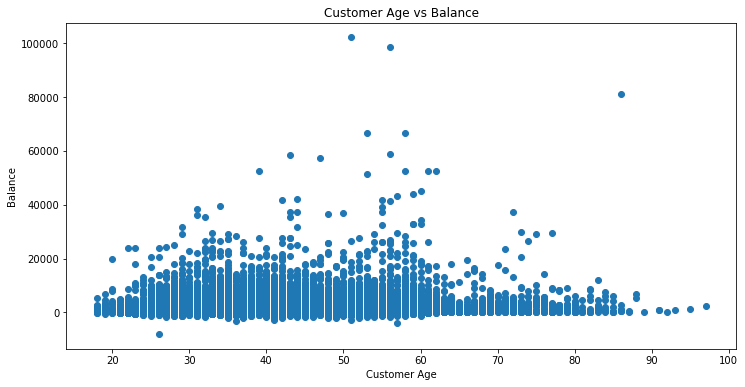

In [42]:
# A scatter plot that displays customer age and their balance
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_train['customer_age'], df_train['balance'])
ax.set_xlabel('Customer Age')
ax.set_ylabel('Balance')
ax.set_title('Customer Age vs Balance')
plt.show()

In [43]:
#checking for missing values in customer age of train set
df_train["customer_age"].isnull().sum()

619

In [44]:
#replacing missing values with the mean of the customers
customer_mean= df_train["customer_age"].mean()
df_train["customer_age"].fillna(value=customer_mean, inplace=True)

In [45]:
#checking for missing values in customer age of train set
df_train["customer_age"].isnull().sum()

0

In [46]:
#checking for missing values in customer age of test set
df_test["customer_age"].isnull().sum()

270

In [47]:
#replacing missing values with the mean of the customers
customer_mean_test= df_test["customer_age"].mean()
df_test["customer_age"].fillna(value=customer_mean_test, inplace=True)

In [48]:
#checking for missing values in customer age of test set
df_test["customer_age"].isnull().sum()

0

In [49]:
#checking for missing values in balance of train set
df_train["balance"].isnull().sum()

399

In [50]:
#replacing missing values with the mean of the balance
balance_mean= df_train["balance"].mean()
df_train["balance"].fillna(value=balance_mean, inplace=True)

In [51]:
#checking for missing values in balance of train set
df_train["balance"].isnull().sum()

0

In [52]:
#checking for missing values in balance of test set
df_test["balance"].isnull().sum()

181

In [53]:
#replacing missing values with the mean of the balance
balance_test_mean= df_test["balance"].mean()
df_test["balance"].fillna(value=balance_test_mean, inplace=True)

In [54]:
#checking for missing values in balance of test set
df_test["balance"].isnull().sum()

0

In [55]:
#checking for correlation in training dataset
corr=df_train.corr()
corr.style.background_gradient(axis=None)

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign
customer_age,1.000000,0.102059,-0.012617,-0.006870,0.006128
balance,0.102059,1.000000,0.001616,0.016634,-0.020664
day_of_month,-0.012617,0.001616,1.000000,-0.034856,0.165168
last_contact_duration,-0.006870,0.016634,-0.034856,1.000000,-0.086517
num_contacts_in_campaign,0.006128,-0.020664,0.165168,-0.086517,1.000000


In [56]:
#checking for correlation in test dataset
corr=df_test.corr()
corr.style.background_gradient(axis=None)

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign
customer_age,1.000000,0.069974,-0.003514,0.004686,0.004166
balance,0.069974,1.000000,0.009161,0.032196,0.004330
day_of_month,-0.003514,0.009161,1.000000,-0.021915,0.155727
last_contact_duration,0.004686,0.032196,-0.021915,1.000000,-0.083385
num_contacts_in_campaign,0.004166,0.004330,0.155727,-0.083385,1.000000


In [59]:
"""Building Model"""

'Building Model'

In [60]:
#splitting the data
X= df_train[["customer_age", "balance"]]

In [61]:
#Building model
model= KMeans(n_clusters=3, random_state=42)

In [62]:
#fitting model to data
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [63]:
labels = model.labels_
labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

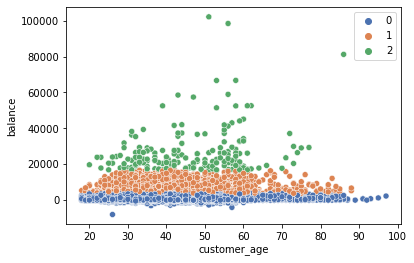

In [64]:
#extract cluster labels that model created during training
#plotting clusters
sns.scatterplot(x=df_train["customer_age"],y=df_train["balance"], hue= labels, palette="deep");

In [65]:
centroids = model.cluster_centers_
centroids

array([[   40.1303783 ,   664.65632209],
       [   43.09571855,  6575.48185275],
       [   46.16605269, 26736.69191919]])

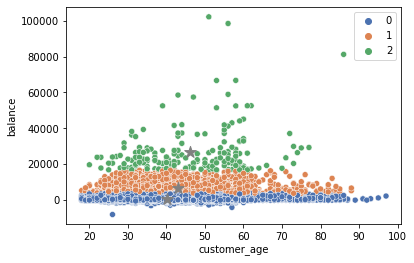

In [66]:
#plotting centroids
sns.scatterplot(x=df_train["customer_age"],y=df_train["balance"], hue= labels, palette="deep"),
plt.scatter(x=centroids[ : , 0], y=centroids[  : , 1], color="gray", marker="*", s=150);

In [67]:
#extracting the inertias
inertia = model.inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 77448745193.79593


In [68]:
#extracting sihouette scores
ss = silhouette_score(X, model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.7923306186565806


In [69]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    #Build model
    model=KMeans(n_clusters=k, random_state=42)
    #train model
    model.fit(X)
    #calculate inertia
    inertia_errors.append(model.inertia_)
    #calculate ss
    silhouette_scores.append(silhouette_score(X, model.labels_))

print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

Inertia: [140666501821.96823, 77448745193.79593, 50236867971.25571, 33081534234.2422, 24113047570.638668, 18522189620.17636, 13846865682.392069, 11116407522.121939, 8791779948.959858, 7291949536.44128, 6060925219.096214]

Silhouette Scores: [0.8560177264934956, 0.7923306186565806, 0.7578729159202737, 0.7203061894200133, 0.6645109394024883, 0.6477559763147587, 0.6448309969053023, 0.6194013012654715, 0.6161685375326591, 0.61134340061071, 0.5646097868249453]


Text(0.5, 1.0, 'K-Means Model: Inertia vs Number of Clusters')

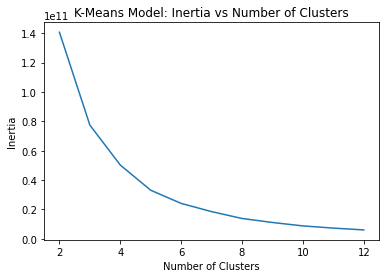

In [70]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters")

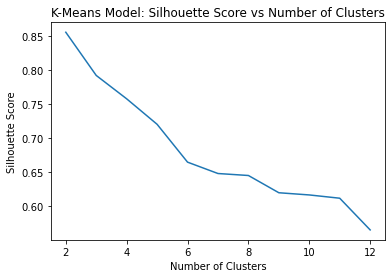

In [71]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Score vs Number of Clusters");

In [72]:
# Build model
final_model = KMeans(n_clusters=3, random_state=42)
# Fit model to data
final_model.fit(X)

KMeans(n_clusters=3, random_state=42)

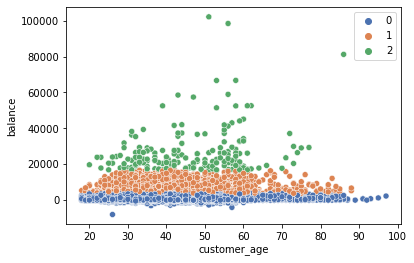

In [73]:
#plotting clusters
sns.scatterplot(x=df_train["customer_age"],y=df_train["balance"], hue= final_model.labels_, palette="deep");

In [74]:
xgb = X.groupby(final_model.labels_).mean()
xgb

,customer_age,balance
0,40.131597,664.034709
1,43.077583,6569.370128
2,46.166053,26736.691919


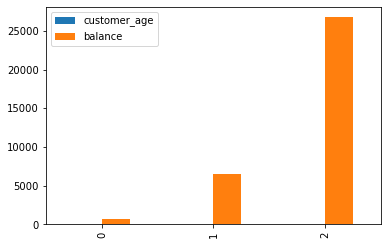

In [75]:
# Create side-by-side bar chart of `xgb`
(xgb).plot(kind="bar");

In [76]:
#fitting model to training set
X_test=df_test[["customer_age","balance"]]

In [77]:
# Build model
final_model = KMeans(n_clusters=3, random_state=42)
# Fit model to data
final_model.fit(X_test)

KMeans(n_clusters=3, random_state=42)

In [78]:
labels = final_model.labels_
labels[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

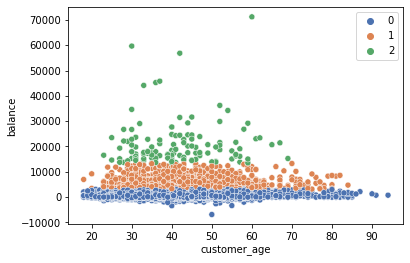

In [79]:
#plotting clusters
sns.scatterplot(x=df_test["customer_age"],y=df_test["balance"], hue= labels, palette="deep");

In [80]:
xgb_test = X_test.groupby(final_model.labels_).mean()
xgb_test

,customer_age,balance
0,40.174564,611.209233
1,42.614494,5647.260959
2,41.610810,21025.184000


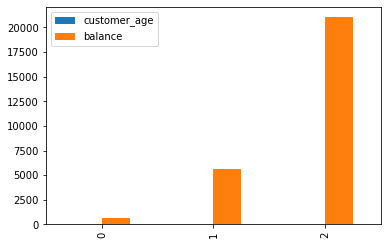

In [81]:
# Create side-by-side bar chart of `xgb`
(xgb_test).plot(kind="bar");